<a href="https://www.kaggle.com/code/anushkagupta23/geeksforgeeks-youtube-engagement-analysis?scriptVersionId=243275804" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Importing libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/gfg-youtube-engagement/gfg.csv


READ THE FILE


In [2]:
df=pd.read_csv('/kaggle/input/gfg-youtube-engagement/gfg.csv')

In [3]:
df.shape

(2091, 9)

DESCRIBES ONLY DESCRIBES COLUMN WITH ALL NUMERIC VALUES

In [4]:
df.describe()

,comments
count,2058.000000
mean,12.698737
std,27.884626
min,0.000000
25%,2.000000
50%,5.000000
75%,13.000000
max,672.000000


Finding null values and droping rows with null or NaN values

In [5]:
df.isnull().sum()

video_link          0
thumbnail_link    205
duration            0
title              20
views              20
likes               0
comments           33
date               20
description        21
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

video_link        0
thumbnail_link    0
duration          0
title             0
views             0
likes             0
comments          0
date              0
description       0
dtype: int64

FINDING VIDEOS OF SPECIFIC TITLE

In [8]:
c = 0

title = 'Python'.lower()

for i in df['title']:
    if (title in i.lower()):
        c += 1
        print(i)
        
print(c)

Python for Data Science | Data Science Master Bootcamp | Arpit Jain
Applications of Python
Introduction To Python | GeeksforGeeks
How to Connect Python With MySQL DataBase? | GeeksforGeeks
Numpy Tutorial for Beginners | Learn Python From Scratch | GeeksforGeeks Python
Generating Word Cloud in Python | GeeksforGeeks
Automate Google Search using Python Selenium | GeeksforGeeks
How to Build a Weather App in Python? | GeeksforGeeks
Python vs R - Which One is Best For ML and Data Science? | GeeksforGeeks
Spelling Checker Program Using Python Tkinter | GeeksforGeeks
Convert Text to Speech Using Python | GeeksforGeeks
Automate WhatsApp Message Using Python | GeeksforGeeks
How to Convert Any Python File to .exe? | GeeksforGeeks
Making Audio Book From Any PDF Using Python | GeeksforGeeks
Creating Random Password Generator Using Python | GeeksforGeeks
How to Create a Login System in Python Using Django? | Python Projects | GeeksforGeeks
MCQ Quiz Game Using Python Tkinter | Python Projects | Geek

In [9]:
data= df.values

FINDING VIDEOS OF SPECIFIC TITLE

In [10]:
c=0
title = 'data'.lower()


for i in data:
    if(title in i[3].lower()):
        c+=1
        print(i[3] , i[0])

print(c)

Learn Data Structures and Algorithms | GeeksforGeeks https://www.youtube.com//watch?v=EDPTs9Cr6zU
How to Recognize which Data Structure to use in a question | Geeks Summer Carnival | GeeksforGeeks https://www.youtube.com//watch?v=5NhY6UMuaQ0
TED Talk Data Analysis Project | Data Science Master Bootcamp | Ashish Jangra https://www.youtube.com//watch?v=2rwwLelOaIw
Getting Started with Data Analysis | Data Science Master Bootcamp | Ashish Jangra https://www.youtube.com//watch?v=twD083caDaA
Python for Data Science | Data Science Master Bootcamp | Arpit Jain https://www.youtube.com//watch?v=oWjUJbbF0rQ
Master Bootcamp - Data Science (Live) | March 24-28 | GeeksforGeeks https://www.youtube.com//watch?v=aKtp-hYN9pU
A day in the life of a Data Analyst https://www.youtube.com//watch?v=aFn9XsUjpiw
A Day in life of a Data Engineer https://www.youtube.com//watch?v=gF3i7zgg_0s
Understanding the essence of Data Science | Resolution Days 2022 | GeeksforGeeks https://www.youtube.com//watch?v=uog1KeFVf

FINDING VIDEOS THAT ARE RELATED TO PYTHON FOR DATA SCIENCE

In [11]:
c = 0
keywords = ['data', 'python']

for i in data:
    if all(keyword in i[3].lower() for keyword in keywords):
        c += 1
        print(i[3], i[0])

print(c)

Python for Data Science | Data Science Master Bootcamp | Arpit Jain https://www.youtube.com//watch?v=oWjUJbbF0rQ
How to Connect Python With MySQL DataBase? | GeeksforGeeks https://www.youtube.com//watch?v=tLzr727qA98
Python vs R - Which One is Best For ML and Data Science? | GeeksforGeeks https://www.youtube.com//watch?v=5YYdFsvtDoM
Top 10 Python Libraries For Data Science | GeeksforGeeks https://www.youtube.com//watch?v=E3jbcgFRivE
Build Your First Data Science Web App Using Python | GeeksforGeeks https://www.youtube.com//watch?v=dr78W28vzbM
Python | Pandas dataframe.round() | GeeksforGeeks https://www.youtube.com//watch?v=rOnKa_tzV04
Python | Pandas dataframe.skew() | GeeksforGeeks https://www.youtube.com//watch?v=wbDxmlpV3t0
Python | Pandas dataframe.subtract() | GeeksforGeeks https://www.youtube.com//watch?v=yHR-ZUmmrQQ
Python | Pandas dataframe.sub() | GeeksforGeeks https://www.youtube.com//watch?v=A3xrtPHMrM8
Python | Pandas dataframe.aggregate() | GeeksforGeeks https://www.youtu

CONVERTING COMMA SEPARATED STRING VALUES IN VIEWS INTO INTEGERS

In [12]:
views = []

for i in df['views']:
    views.append(int(str(i).replace(',','')))

In [13]:
df['views']=views

In [14]:
df['views'].sum()

45539373

Now, describe gives us two columns

In [15]:
df.describe()

,views,comments
count,1.854000e+03,1854.000000
mean,2.456277e+04,12.570119
std,9.258215e+04,28.238159
min,2.240000e+02,0.000000
25%,2.308250e+03,2.000000
50%,5.021500e+03,5.000000
75%,1.505850e+04,12.000000
max,1.912881e+06,672.000000


In [16]:
def convert_k_to_number(val):
    if isinstance(val, str):
        val = val.strip().replace(',', '')
        if 'K' in val:
            return int(float(val.replace('K', '')) * 1000)
        elif 'M' in val:
            return int(float(val.replace('M', '')) * 1_000_000)
        else:
            return int(float(val))
    return int(val)

# Apply to relevant columns
df['likes'] = df['likes'].apply(convert_k_to_number)
df['views'] = df['views'].apply(convert_k_to_number)
df['comments'] = df['comments'].apply(convert_k_to_number)

df.head()


,video_link,thumbnail_link,duration,title,views,likes,comments,date,description
0,https://www.youtube.com//watch?v=ijSJMr0lPko,https://i.ytimg.com/vi/ijSJMr0lPko/hqdefault.jpg,"16 minutes, 56 seconds",How I got hired via GFG Job Portal,392,21,0,Streamed live 8 hours ago,"In this webinar, Vedant Thakur will talk about..."
1,https://www.youtube.com//watch?v=FbfeCOgNucE,https://i.ytimg.com/vi/FbfeCOgNucE/hqdefault.jpg,"46 minutes, 18 seconds",Understanding Sorting Techniques in an hour | ...,2220,131,3,Streamed live on 10 Apr 2022,Are you Carnival ready?\r\nBecause we have got...
2,https://www.youtube.com//watch?v=W2VtjDyJKkU,https://i.ytimg.com/vi/W2VtjDyJKkU/hqdefault.jpg,"33 minutes, 40 seconds",How I got hired via GFG Job Portal | Get Hired...,905,26,0,Streamed live on 9 Apr 2022,"In this webinar, Shivam Sharma will talk about..."
3,https://www.youtube.com//watch?v=dP3ER37ZgyY,https://i.ytimg.com/vi/dP3ER37ZgyY/hqdefault.jpg,"40 minutes, 28 seconds",Must Do System Design Questions,1051,52,1,Streamed live on 9 Apr 2022,Are you Carnival ready?\r\nBecause we have got...
4,https://www.youtube.com//watch?v=dfbozMNQJfE,https://i.ytimg.com/vi/dfbozMNQJfE/hqdefault.jpg,"30 minutes, 53 seconds",Dispelling Myths and Pre conceptions of Progra...,819,41,0,Streamed live on 8 Apr 2022,Are you Carnival ready?\r\nBecause we have got...


In [17]:
# Engagement Rate = (likes + comments) / views
df['engagement_rate'] = (df['likes'] + df['comments']) / df['views']
df['engagement_rate'] = df['engagement_rate'].round(4)  # rounding for readability
df[['title', 'views', 'likes', 'comments', 'engagement_rate']].head()

,title,views,likes,comments,engagement_rate
0,How I got hired via GFG Job Portal,392,21,0,0.0536
1,Understanding Sorting Techniques in an hour | ...,2220,131,3,0.0604
2,How I got hired via GFG Job Portal | Get Hired...,905,26,0,0.0287
3,Must Do System Design Questions,1051,52,1,0.0504
4,Dispelling Myths and Pre conceptions of Progra...,819,41,0,0.0501


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


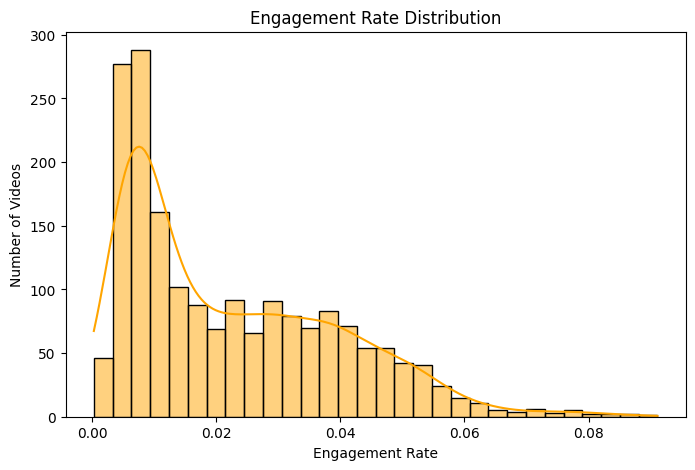

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot engagement rate distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['engagement_rate'], bins=30, color='orange', kde=True)
plt.title("Engagement Rate Distribution")
plt.xlabel("Engagement Rate")
plt.ylabel("Number of Videos")
plt.show()


Top 10 Most Engaging Videos

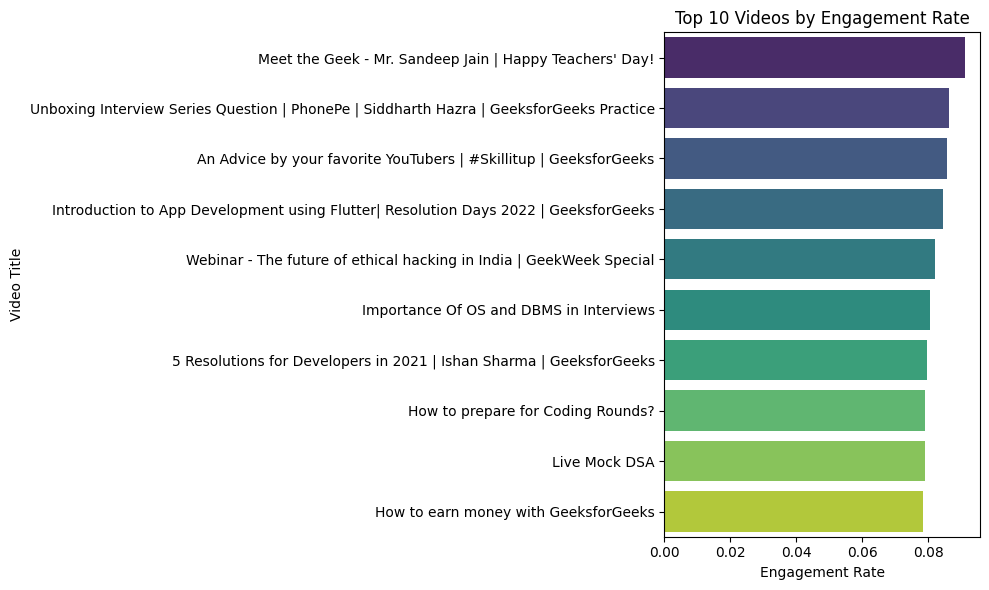

In [19]:
top_engaged = df.sort_values(by='engagement_rate', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_engaged, y='title', x='engagement_rate', palette='viridis')
plt.title("Top 10 Videos by Engagement Rate")
plt.xlabel("Engagement Rate")
plt.ylabel("Video Title")
plt.tight_layout()
plt.show()


Most Viewed Videos

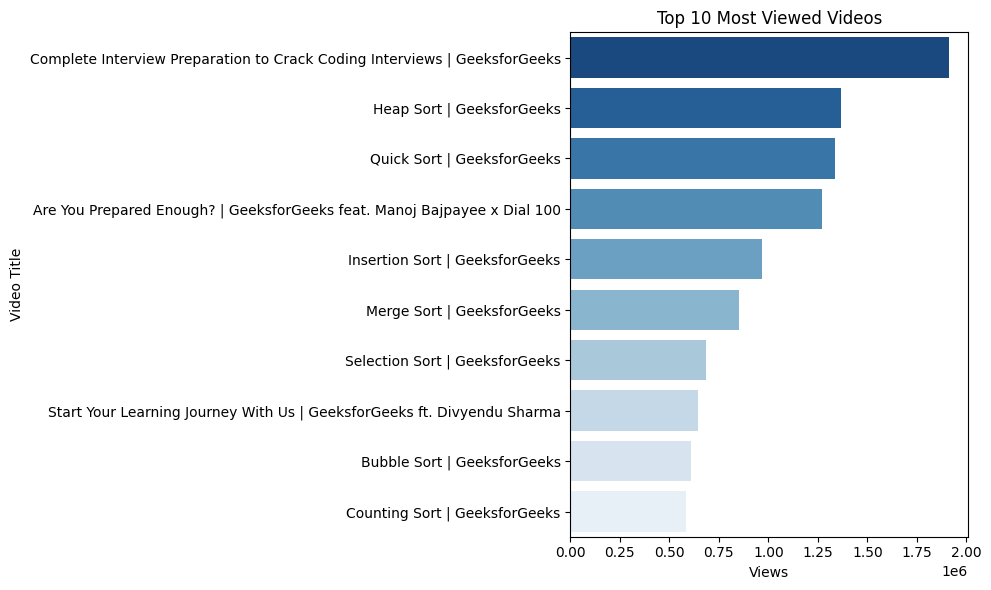

In [20]:
top_views = df.sort_values(by='views', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_views, x='views', y='title', palette='Blues_r')
plt.title("Top 10 Most Viewed Videos")
plt.xlabel("Views")
plt.ylabel("Video Title")
plt.tight_layout()
plt.show()

Likes vs Views Scatter Plot

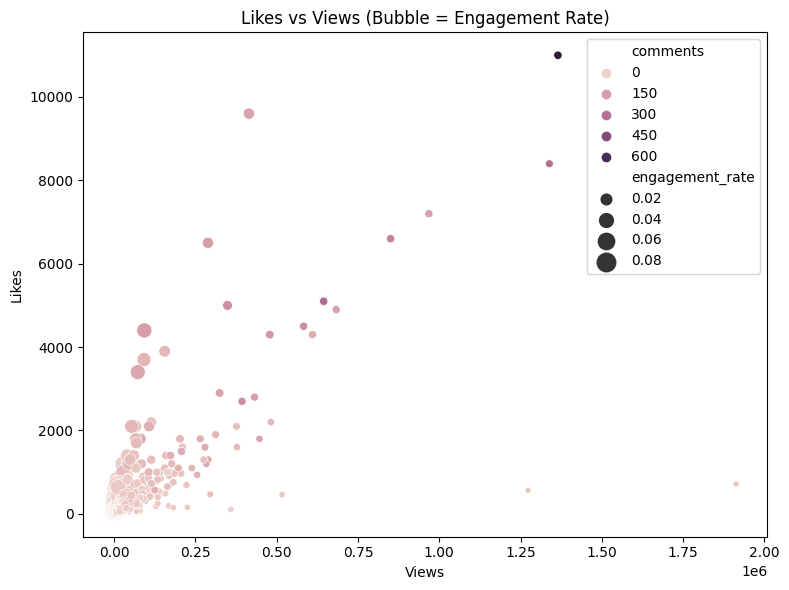

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='views', y='likes', hue='comments', size='engagement_rate', sizes=(20, 200))
plt.title("Likes vs Views (Bubble = Engagement Rate)")
plt.xlabel("Views")
plt.ylabel("Likes")
plt.legend()
plt.tight_layout()
plt.show()

Word Cloud of Titles or Tags

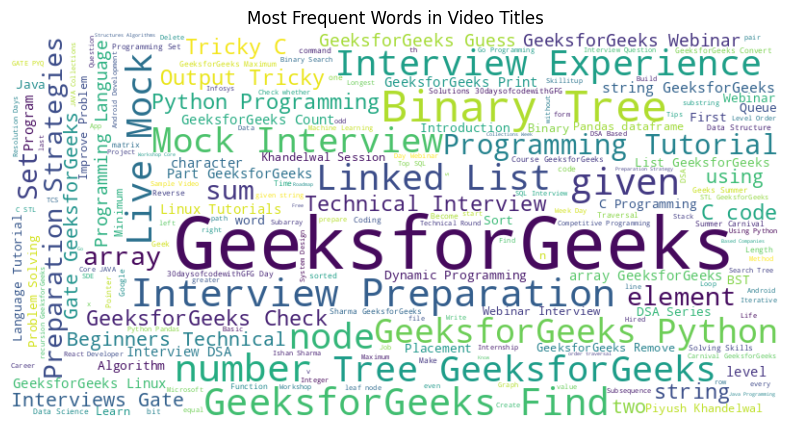

In [22]:
from wordcloud import WordCloud

text = " ".join(df['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words in Video Titles")
plt.show()


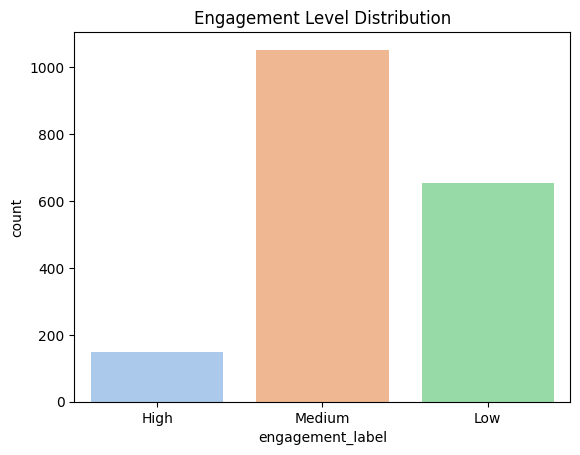

In [23]:
def label_engagement(rate):
    if rate > 0.05:
        return 'High'
    elif rate > 0.01:
        return 'Medium'
    else:
        return 'Low'

df['engagement_label'] = df['engagement_rate'].apply(label_engagement)
sns.countplot(data=df, x='engagement_label', palette='pastel')
plt.title("Engagement Level Distribution")
plt.show()
